# Ford GoBike System Data Exploration
## by Gamal Mashali

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This dataset consists of data about all monthes of 2018 and some monthes of 2019 .it is avalibale on this link : 
https://s3.amazonaws.com/fordgobike-data/index.html

In [1]:
# import packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from requests import get
from zipfile import ZipFile
import glob
from io import BytesIO

%matplotlib inline

In [2]:
#download the needed files and extract them
months = ["201801", "201802", "201803", "201804", "201805", "201806", "201807", "201808", "201809", "201810", "201811", "201812", 
          "201901", "201902", "201903", "201904"]

for month in months:
    link = "https://s3.amazonaws.com/fordgobike-data/"+ month +"-fordgobike-tripdata.csv.zip"
    zipfile = get(link)
    with ZipFile(BytesIO(zipfile.content)) as file:
        file.extractall()

In [3]:
#collect all datasets in one file
all_files = glob.glob("*.csv")
all_csv = (pd.read_csv(f) for f in all_files)
df_merged  = pd.concat(all_csv, ignore_index=True)
df_merged.to_csv( "newdf.csv")

In [4]:
#load the dataset
df = pd.read_csv('newdf.csv')
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [5]:
# check the shope of data
df.shape

(2734625, 17)

In [6]:
# check the columns and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   duration_sec             int64  
 2   start_time               object 
 3   end_time                 object 
 4   start_station_id         float64
 5   start_station_name       object 
 6   start_station_latitude   float64
 7   start_station_longitude  float64
 8   end_station_id           float64
 9   end_station_name         object 
 10  end_station_latitude     float64
 11  end_station_longitude    float64
 12  bike_id                  int64  
 13  user_type                object 
 14  member_birth_year        float64
 15  member_gender            object 
 16  bike_share_for_all_trip  object 
dtypes: float64(7), int64(3), object(7)
memory usage: 354.7+ MB


In [7]:
# check for null vales
df.isnull().sum()

Unnamed: 0                      0
duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12501
start_station_name          12501
start_station_latitude          0
start_station_longitude         0
end_station_id              12501
end_station_name            12501
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          151625
member_gender              151271
bike_share_for_all_trip         0
dtype: int64

### What is the structure of your dataset?

> The dataset was in many files so I downloaded them then merge them into one file. it cotains 5469250 rows and 18 features.
> The features are duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out how customers versus subscribers use the service, in terms of their average age, and their gender also aginst mothes and weeks.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that I need member gender, also I need to caculate member age from his birth year,moth and weekday of start_time. so I will add them on cleaning step.



#### Quality and tidiness issues in the Data :
1- There is unknown column named "Unnamed: 0".<br>
2- Some columns contains null values like member_birth_year and member_gender.<br>
3- Some columns datatype are wrong.

### Data Clean

In [8]:
# create copy of dataframe to making cleaning on it
df_clean = df.copy()

In [10]:
# drop Unnamed columns.
df_clean.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
# Deleting the rows without gender or birth year
df_clean.dropna(subset = ['member_birth_year', 'member_gender'], inplace=True)

In [12]:
#change start_time and end_time to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [13]:
# extract start time month name
df_clean['start_time_month_name']=df_clean['start_time'].dt.strftime('%B')

In [14]:
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [15]:
#Create column for user's age on 2018
df_clean['member_age'] = 2018-df_clean['member_birth_year'].astype('int')

In [16]:
df_clean.shape

(2583000, 19)

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2583000 entries, 0 to 2734624
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
 16  start_time_month_name    object        
 17  start_time_weekday       ob

In [18]:
# save cleaned dataset to use it later in creating the slides
df_clean.to_csv("newdf_clean.csv")

## Univariate Exploration

#### Check the distribution of user type, between customers and subscribers.

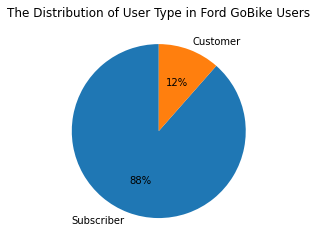

In [19]:
sorted_counts = df_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90);
plt.title("The Distribution of User Type in Ford GoBike Users");

The majority of the users are subscribers, at 88%.

#### The distribution of gender

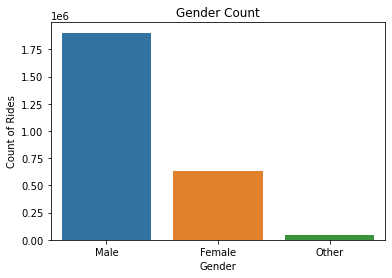

In [20]:
sb.countplot(data = df_clean, x = 'member_gender')
plt.title("Gender Count")
plt.xlabel('Gender')
plt.ylabel('Count of Rides');

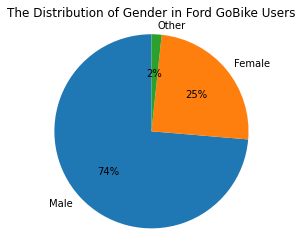

In [21]:
sorted_counts = df_clean['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90)
plt.title("The Distribution of Gender in Ford GoBike Users")
plt.axis('square');

The majority of the members are Male, at 74%.

#### Draw boxplot for Age distribution.

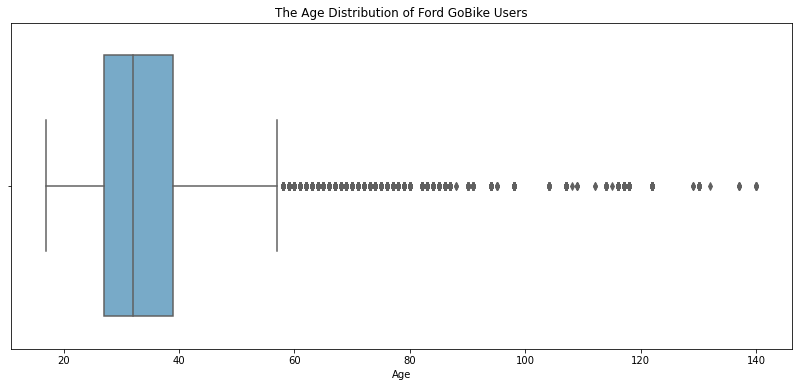

In [22]:
plt.figure(figsize=(14,6))
sb.boxplot(x='member_age', data=df_clean, palette='Blues')
plt.title("The Age Distribution of Ford GoBike Users")
plt.xlabel("Age");

In [23]:
df_clean.member_age.mean()

34.38395238095238

The mean age is 34.38 years old

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The user type variable has 88% subscribers and 12% customer. no null values. I already removed null valuse for member_gender in the cleaning step.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

form the boxplot of age distribution, it seems there are some outlier values.

## Bivariate Exploration

#### Weekday Usage of the Bikeshare System per User Type.

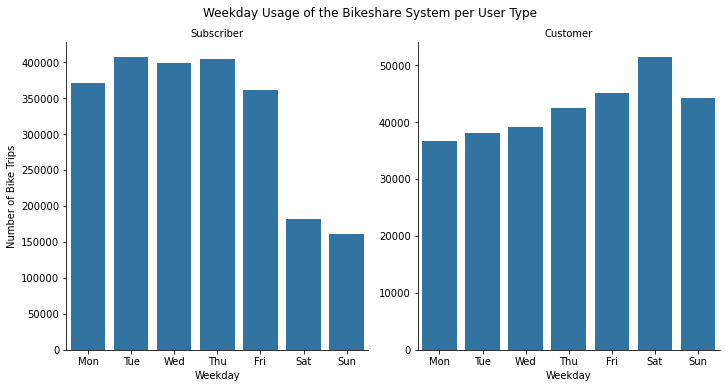

In [24]:
base_color = sb.color_palette()[0]
cat_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False, order = cat_order, color = base_color)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday Usage of the Bikeshare System per User Type', y=1.03);

This analysis is quite illuminating as it shows that subscribers predominately use the ride service on Monday through Friday, while customers ride the most on the weekends. This is most likely due to subscribers using the service to commute to work, while customers use the bikes on an occasional basis for something unusual in their schedule.

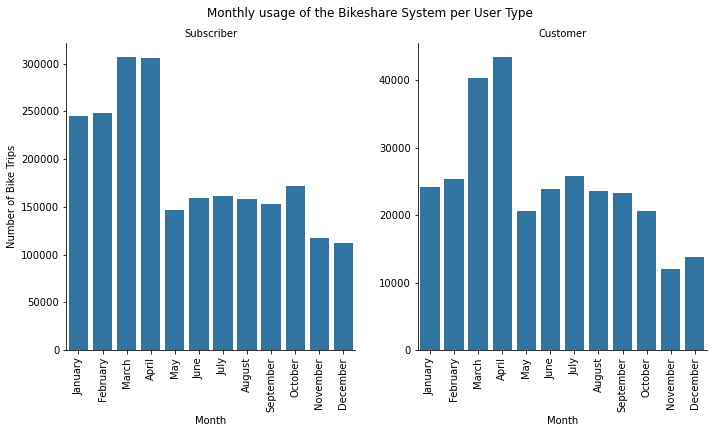

In [25]:
category_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                 'September', 'October', 'November', 'December']
g = sb.catplot(data=df_clean, x='start_time_month_name', col="user_type", kind='count', order=category_order, sharex = True, sharey = False,
            color = base_color)
g.set_axis_labels("Month", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the Bikeshare System per User Type', y=1.03)
g.set_xticklabels(rotation=90);

Both customers and subscribers have a similar trend to their monthly usage, where it increases throughout the winter and spring until it drops in May, and for the remainder of the winter. However, the most popular usage month for customers is April, while the most popular month for subscribers is March.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It was interesting to observe the different usage behaviors between subscribers and customers. Customers show trends towards being more casual in their usage, as they ride more on the weekends, and subscribers appear to use the service on a Monday-Friday basis. It seems likely that subscribers are using the service to commute to work. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No, I didn't.

## Multivariate Exploration

#### Usage of the Bikeshare System per User Type and Gender, based on Weekday

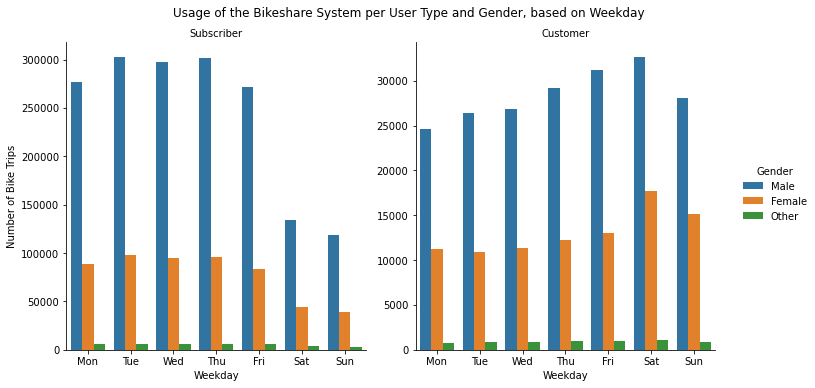

In [26]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Usage of the Bikeshare System per User Type and Gender, based on Weekday', y=1.03);

While there is less female and other gender usage than male, the trend between customers and subscribers of each gender is similar. Customers of all genders use the service more often on the weekends, while subscribers use the system during the week, predominately.

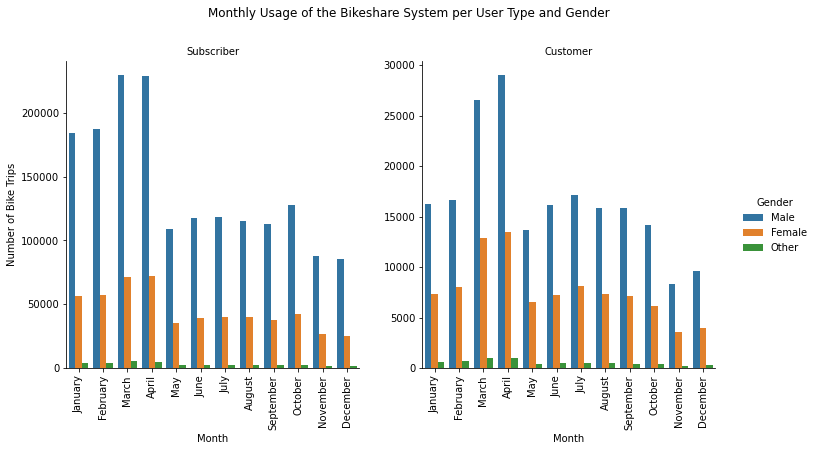

In [27]:
category_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                 'September', 'October', 'November', 'December']
g = sb.catplot(data=df_clean, x='start_time_month_name', col="user_type", hue="member_gender", kind='count', sharey = False, order = category_order)
g.set_axis_labels("Month", "Number of Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly Usage of the Bikeshare System per User Type and Gender', y=1.08)
g.set_xticklabels(rotation=90);

Again, we find that each gender follows a similar pattern to the other genders. The summer months are not as popular for customers or subscribers, and usage increases as the winter and spring occur.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate charts reinforced the earlier relationships that were observed. The customers prefer to use the Bikeshare on weekends, and the subscribers use the service on Monday-Friday, the most. This was not influenced by gender. The same can be said about usage over the months, as the winter and spring are the most popular usage times, regardless of any other factors.

### Were there any interesting or surprising interactions between features?

It was intersting to note that all gender categories had the same distibution for customers and subsribers.